# Content 
    1. Desctiption 
    2. Data Processing 
        2.1 Hypotheses prioritization
        2.2 A/B Testing
    3. Conclusion

# Description
    The aim of this project is to draft and sorts the hypotheses based on urgencies to help the owner of online retail store to improve their revenue. The methodology that will be tested is A/B testing. 

# Data Processing 

# Library Installation & Data Overview

In [2]:
import pandas as pd 
import numpy as np 
import datetime as dt 
from scipy import stats as st 
import math as mth
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv',sep=';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

In [4]:
#check on data description for hypotheses data frame
hypotheses.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 1.6 KB


In [5]:
hypotheses.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [6]:
hypotheses.duplicated().sum()

0

Based on the overview, it can be conclude that this datasets doesn't have any missing value, nor duplicates and the type of datas are correct. There is one thing that need to be revise that is the intial letter for every each of columns name are in capital. This particular reason need to be edited. 

In [7]:
#edition for the intial letter of each columns 
hypotheses= hypotheses.rename(columns={'Hypothesis':'hypothesis', 'Reach':'reach', 'Impact':'impact','Confidence':'confidence','Effort':'effort'})
hypotheses.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [8]:
#check on data description for orders data frame
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 174.3 KB


In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [10]:
orders.duplicated().sum()

0

Based on the overview it can be seen that there are few things that need to be worked on. First, the name of transactionId and visitorId need to be change into transaction_id and visitor_id. Second, the data type of date columns is in object, this should be in datetime. Furthermore, there isn't any missing value in this datasets and duplication

In [11]:
#editing for 2 first columns name 
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})

#data type change 
orders['date'] = orders['date'].map(lambda x:dt.datetime.strptime(x, '%Y-%m-%d'))

In [12]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 105.3 KB


In [13]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 8.2 KB


In [14]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
visits.duplicated().sum()

0

Based on the overview, it could be seen that there is one thing that need to be corrected, that is the data type of date column. The type of this column is in object, this should be in datetime type 

In [16]:
#change the data type 
visits['date'] = visits['date'].map(lambda x:dt.datetime.strptime(x, '%Y-%m-%d'))

In [17]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.6 KB


# Hypotheses Prioritization

objective 1: use ICE framework to prioritize hypotesis and sorts these using descending

In [18]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [19]:
hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

(hypotheses[['hypothesis','ICE']].sort_values(by='ICE',ascending=False))

,hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


objective 2: use RICE framework to prioritize hypotesis and sorts these using descending

In [20]:
hypotheses['RICE'] = (hypotheses['reach']*hypotheses['impact']*hypotheses['confidence']) / hypotheses['effort']
(hypotheses[['hypothesis','RICE']].sort_values(by='RICE',ascending=False))

,hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


Based on ICE method the top 3 hypothesis are 8,0,7. Meanwhile based on RICE method the top 3 are 7,2,0. Eventhough the first priority is different but hypothesis number 0 dan 7 are still the likely hypothesis to be chosen

# A/B Testing

objective 1: Gambarkan pendapatan kumulatif berdasarkan kelompok. Buat kesimpulan dan asumsinya.

In [21]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [22]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [23]:
dates_group = orders[['date','group']].drop_duplicates()
dates_group.sample(2)

,date,group
730,2019-08-30,A
498,2019-08-04,B


In [24]:
orders_aggregate = dates_group.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date':'max', 'group':'max', 'transaction_id':pd.Series.nunique, 'visitor_id':pd.Series.nunique, 'revenue':'sum'}), axis=1).sort_values(by=['date','group'])
orders_aggregate.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,2356.8
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,44,38,3860.3
173,2019-08-02,B,45,43,4243.8
291,2019-08-03,A,68,62,5675.5


In [25]:
visits_aggregate = dates_group.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group']==x['group'])].agg({'date':'max', 'group':'max', 'visits':'sum'}),axis=1).sort_values(by=['date','group'])
visits_aggregate.head()                                                   

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [26]:
cumulative_data = orders_aggregate.merge(visits_aggregate, left_on=['date','group'], right_on=['date','group'])

cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


In [27]:
cumulative_revenue_A = cumulative_data[cumulative_data['group']=='A'][['date','revenue','orders']] 
cumulative_revenue_A.head()

,date,revenue,orders
0,2019-08-01,2356.8,24
2,2019-08-02,3860.3,44
4,2019-08-03,5675.5,68
6,2019-08-04,6822.1,84
8,2019-08-05,8810.2,109


In [28]:
cumulative_revenue_B = cumulative_data[cumulative_data['group']=='B'][['date','revenue','orders']] 
cumulative_revenue_B.head()

,date,revenue,orders
1,2019-08-01,1620.0,21
3,2019-08-02,4243.8,45
5,2019-08-03,6050.6,61
7,2019-08-04,7767.9,78
9,2019-08-05,9262.9,101


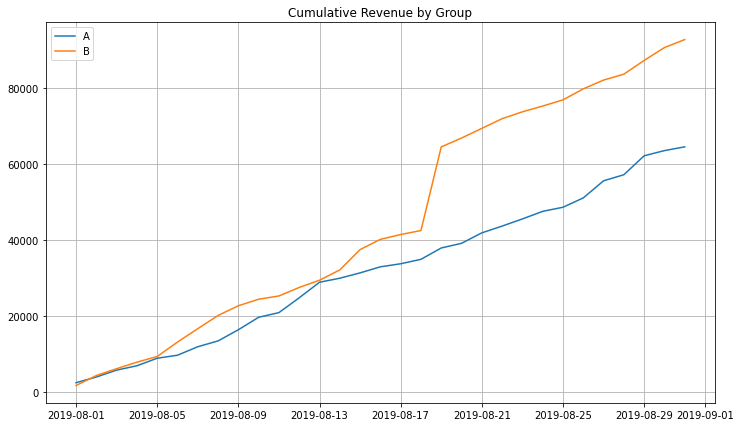

In [29]:
plt.figure(figsize=(12,7))
plt.title('Cumulative Revenue by Group')
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')
plt.grid()
plt.legend()

Based on the calculation it can be seen that both of groups have an increased revenue's trend during testing. Specifically, on group B there was a siginificantly rose line between 17-21 august 2019. This ocassion maybe happened due to either there was a purchasing with an extra large quantity or the price of the product was high

objective 2: Gambarkan ukuran pesanan rata-rata kumulatif berdasarkan kelompok. Buat kesimpulan dan asumsinya.

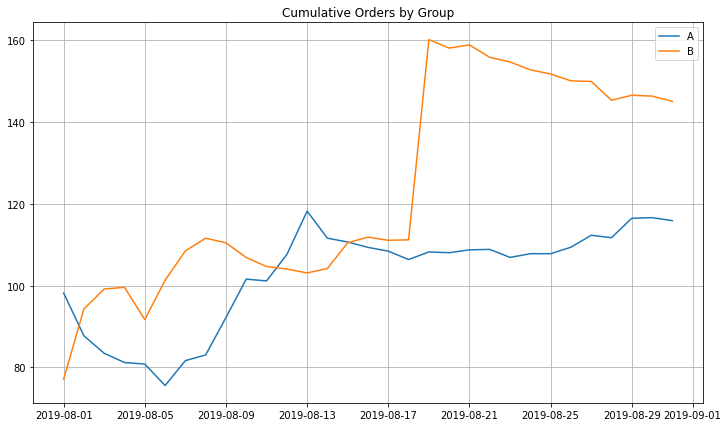

In [30]:
plt.figure(figsize=(12,7))
plt.title('Cumulative Orders by Group')
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label='B')
plt.grid()
plt.legend()

Based on the graph it can be seen that, both groups had an increased trend during the testing. 

Looking more closely to group A, it started with under 100 orders, four days after that the orders was drop immedietly by 20 orders. Since then to 13 August, it achieve the peak moment to almost 120 orders. The rest was decreased and ended at approximetly 118 orders. 

Meanwhile, group B start with almost 80 orders. It continue to rise to around 110 orders despite there were a slight drop during that time. From 18 August to 19 August, it recorded that this group achieved the peak to 160 orders. The rest was decrease gradually and close with around 142 orders.   
In here the analyst have an assumption for event occur in group B, that is maybe there was a large volume purchased or the price of product are expensive as the reason why there were abruptly high revenue 

Objective 3: Gambarkan perbedaan relatif untuk ukuran pesanan rata-rata kumulatif kelompok B yang dibandingkan dengan kelompok A. Buat kesimpulan dan asumsinya.

In [31]:
merged_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, left_on='date', right_on='date', how='left', suffixes=['A','B'])
merged_cumulative_revenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2356.8,24,1620.0,21
1,2019-08-02,3860.3,44,4243.8,45
2,2019-08-03,5675.5,68,6050.6,61
3,2019-08-04,6822.1,84,7767.9,78
4,2019-08-05,8810.2,109,9262.9,101


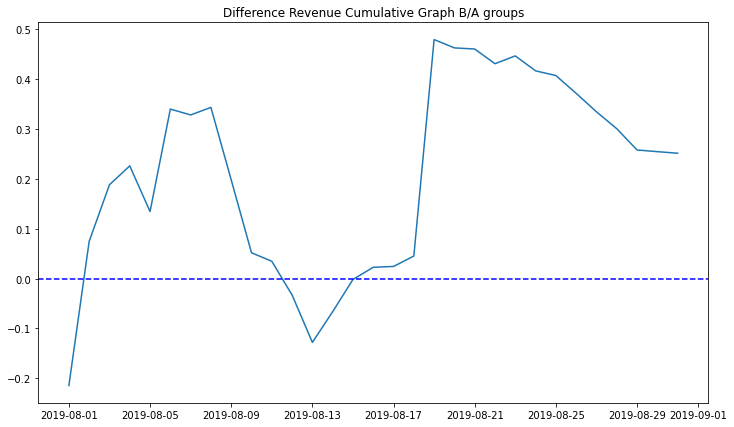

In [32]:
plt.figure(figsize=(12,7))
plt.title('Difference Revenue Cumulative Graph B/A groups')
plt.plot(merged_cumulative_revenue['date'],(merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)
plt.axhline(y=0, color='blue', linestyle='--')

Based on the graph, it can be seen that there were quite few moment that had been recorded to have a sharp incresing average purchasing. This could be indicated by someone had been bought the product extremely large quantity or it could be because of the product's tag

Objective 4: Gambarkan konversi kumulatif berdasarkan kelompok. Buat kesimpulan dan asumsinya.

In [33]:
cumulative_data.sample(2)

,date,group,orders,buyers,revenue,visitors
44,2019-08-23,A,426,385,45543.6,13927
5,2019-08-03,B,61,59,6050.6,1803


In [34]:
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']
cumulative_data.sample(2)

,date,group,orders,buyers,revenue,visitors,conversion
46,2019-08-24,A,441,400,47546.3,14322,0.030792
6,2019-08-04,A,84,77,6822.1,2562,0.032787


In [35]:
cumulative_data_A = cumulative_data[cumulative_data['group']=='A']
cumulative_data_A.sample(2)

,date,group,orders,buyers,revenue,visitors,conversion
44,2019-08-23,A,426,385,45543.6,13927,0.030588
22,2019-08-12,A,230,210,24749.1,7575,0.030363


In [36]:
cumulative_data_B = cumulative_data.query('group=="B"')
cumulative_data_B.sample(2)

,date,group,orders,buyers,revenue,visitors,conversion
21,2019-08-11,B,241,228,25228.3,6998,0.034438
59,2019-08-30,B,620,567,90736.3,18198,0.034070


In [37]:
#mengetahui nilai max dan min untuk tanggal sebagai sumbu X 
print(cumulative_data_A['date'].max())
print(cumulative_data_A['date'].min())
print(cumulative_data_B['date'].max())
print(cumulative_data_B['date'].min())

2019-08-31 00:00:00
2019-08-01 00:00:00
2019-08-31 00:00:00
2019-08-01 00:00:00


In [38]:
#mengetahui nilai max dan min untuk konversi sebagai sumbu Y
print(cumulative_data_A['conversion'].max())
print(cumulative_data_A['conversion'].min())
print(cumulative_data_B['conversion'].max())
print(cumulative_data_B['conversion'].min())

0.03685636856368564
0.029217427214536445
0.036323084275927994
0.029453015427769985


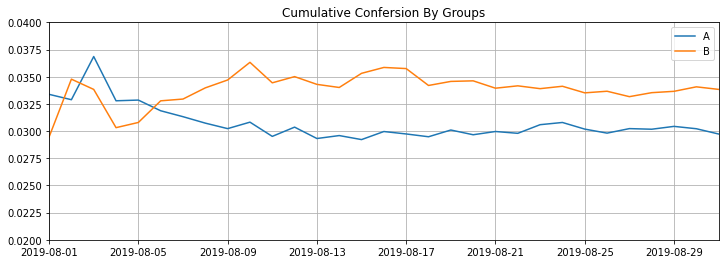

In [39]:
plt.figure(figsize=(12,4))
plt.title('Cumulative Confersion By Groups')
plt.plot(cumulative_data_A['date'],cumulative_data_A['conversion'], label="A")
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'],label='B')
plt.legend()
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), 0.02, 0.04])
plt.grid()
plt.show()


Based on the line graph, it can be seen that both groups had fluctuating conversion trends, but then group A's conversion rate fell before becoming stable, while group B's conversion rate rose before finally becoming stable.

objective 5: Hitung tingkat konversi setiap kelompok sebagai rasio pesanan terhadap jumlah kunjungan setiap hari. Buat grafik tingkat konversi harian dari kedua kelompok dan jelaskan perbedaannya. Buat kesimpulan dan asumsinya

In [40]:
merge_cumulative_conversion = cumulative_data_A[['date','conversion']].merge(cumulative_data_B[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A','B'])
merge_cumulative_conversion.sample(2)

,date,conversionA,conversionB
26,2019-08-27,0.030227,0.033166
12,2019-08-13,0.029316,0.034296


No handles with labels found to put in legend.


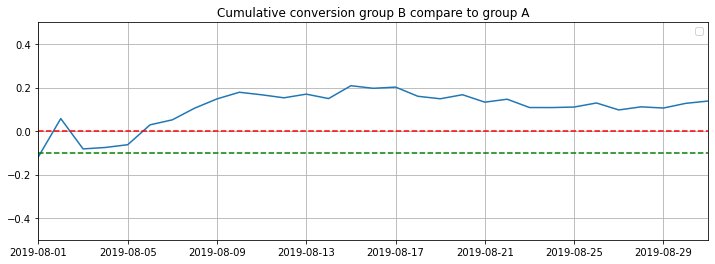

In [41]:
plt.figure(figsize=(12,4))
plt.title('Cumulative conversion group B compare to group A')
plt.plot(merge_cumulative_conversion['date'], merge_cumulative_conversion['conversionB']/merge_cumulative_conversion['conversionA']-1)
plt.legend()

plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=-0.1, color='green', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), -0.5, 0.5])
plt.grid()

Based on the graph it can be seen that, in general the conversion rate isn't stable where group B start beind group A but later on day-6 it leads the comparison. Since then the conversion value increased until day-15 and gradually drop untill the last day of test. Despite the trend had been shown, it still to soon to draw conclustions about this test

Objective 6: Buat diagram tebar (scatter chart) untuk jumlah pesanan per pengguna. Buat kesimpulan dan asumsinya.
Objective 7: Hitung persentil ke-95 dan ke-99 untuk jumlah pesanan per pengguna. Tentukan titik ketika suatu titik data berubah menjadi anomali.

In [42]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [43]:
order_per_visitor = orders.groupby('visitor_id').agg({'transaction_id':'nunique'}).sort_values(by='transaction_id').reset_index()
order_per_visitor = order_per_visitor.rename(columns={'visitor_id':'user','transaction_id':'order'})
order_per_visitor.head()

,user,order
0,5114589,1
1,2705308997,1
2,2710193528,1
3,2710478747,1
4,2710492161,1


In [44]:
order_per_visitor[order_per_visitor['order']<=2].sum()

user     2128759801499
order             1065
dtype: int64

Text(0, 0.5, 'order counted')

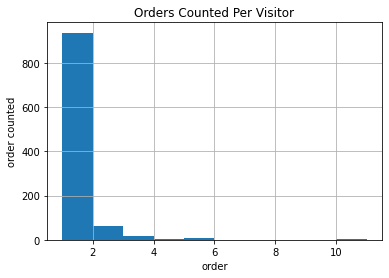

In [45]:
order_per_visitor['order'].hist()
plt.title('Orders Counted Per Visitor')
plt.xlabel('order')
plt.ylabel('order counted')

Text(0, 0.5, 'order counted')

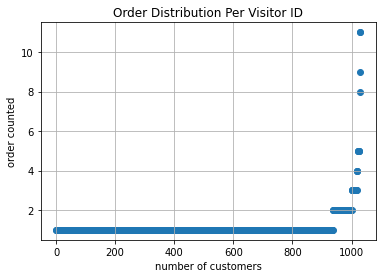

In [46]:
x_values = pd.Series(range(0,len(order_per_visitor)))
plt.scatter(x_values, order_per_visitor['order'])
plt.grid()
plt.title('Order Distribution Per Visitor ID')
plt.xlabel('number of customers')
plt.ylabel('order counted')

Based on the charts it can be seen that majority of store's customers bought the product by less than 2 times that counted for 1065 users

In [47]:
np.percentile(order_per_visitor['order'], [95, 99])

array([2., 4.])

The percentage of order quantities above 2 is not more than 5%, while the order quantity above 4 is not more than 1%. The value of the number of orders that will be used as a benchmark to be categorized as an anomaly is a value that is more than 2

Objective 8: Buat diagram tebar (scatter chart) untuk harga pesanan. Buat kesimpulan dan asumsinya.

Objective 9: Hitung persentil ke-95 dan ke-99 untuk harga pesanan. Tentukan titik ketika suatu titik data berubah menjadi anomali.

In [48]:
revenue_per_visitor = orders.drop(['group','date','transaction_id'],axis=1).groupby('visitor_id').agg({'revenue':'sum'})
revenue_per_visitor.head()

,revenue
visitor_id,
5114589,10.8
6958315,25.9
8300375,196.2
11685486,100.4
39475350,65.4


Text(0, 0.5, 'customer')

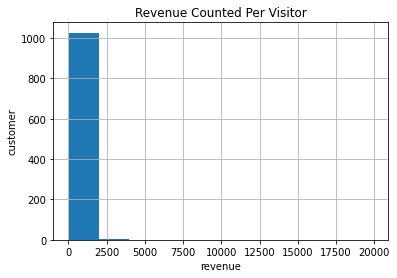

In [49]:
revenue_per_visitor['revenue'].hist()
plt.title('Revenue Counted Per Visitor')
plt.xlabel('revenue')
plt.ylabel('customer')

Text(0, 0.5, 'revenue')

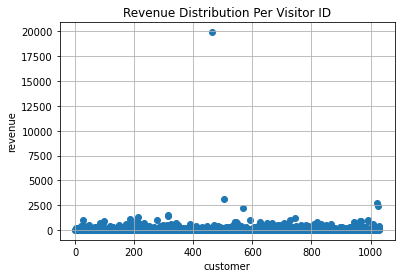

In [50]:
x_values = pd.Series(range(0,len(revenue_per_visitor)))
plt.scatter(x_values, revenue_per_visitor['revenue'])
plt.grid()
plt.title('Revenue Distribution Per Visitor ID')
plt.xlabel('customer')
plt.ylabel('revenue')

Based on the sactter plot it can be seen that most of sotre customer place order with revenue under 2500 that counted for around 1000 people. Furthermore there are 2 people who had bill slightly above 2500 and 1 people who placed order with 20.000 bill

In [51]:
np.percentile(revenue_per_visitor['revenue'], [95, 99])

array([ 510.35, 1047.24])

The percentage of order quantities above 510.35 is not more than 5%, while the order quantity above 1047.24 is not more than 1%. The value of the number of revenue that will be used as a benchmark to be categorized as an anomaly is a value that is more than 1047.24

Objective 10: Temukan signifikansi statistik perbedaan konversi antar kelompok menggunakan data mentah. Buat kesimpulan dan asumsinya.

In [52]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [53]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [54]:
order_by_user_A = orders[orders['group']=='A'].groupby('visitor_id',as_index=False).agg({'transaction_id':'nunique'})
order_by_user_A.columns = ['visitor','order']

order_by_user_B = orders[orders['group']=='B'].groupby('visitor_id',as_index=False).agg({'transaction_id':'nunique'})
order_by_user_B.columns = ['visitor','order']

In [55]:
sample_A = pd.concat([order_by_user_A['order'], 
                      pd.Series(0, index=np.arange(
                          visits[visits['group']=='A']['visits'].sum() 
                          - len(order_by_user_A['order'])), name='order')],axis=0)

sample_B = pd.concat([order_by_user_B['order'], 
                      pd.Series(0, index=np.arange(
                          visits[visits['group']=='B']['visits'].sum() 
                          - len(order_by_user_B['order'])), name='order')],axis=0)

In [56]:
#H0 : There is no differences between sample A and sample B
#H1 : There is differences between sample A and sample B
    
p_value = st.mannwhitneyu(sample_A, sample_B)[1]
print(f'The p-value from Mann-Whitney method is {p_value:.3f}.')
alpha = 0.05

if(p_value < alpha):
    print('Reject H0: There is a differences bewteen groups')
else:
    print('Accept H0: There is NO differences between groups')

print("{0:.3f}".format(sample_B.mean()/sample_A.mean()-1))     

The p-value from Mann-Whitney method is 0.017.
Reject H0: There is a differences bewteen groups
0.138


Based on the calculation, it could be conclude that their is a differences between group A and group B because the p-value in this data is less than the alpha (0.017 < 0.05). Furthermore, there is a increasing relative form group B by 0.138 

Objective 11: Temukan signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data mentah. Buat kesimpulan dan asumsinya.

In [57]:
#H0 : There is no differences between groups interm of average order size
#H1 : There is differences between groups interm of average order size

p_value = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

print(f'The p-value from Mann-Whitney method is {p_value:.3f}.')
alpha = 0.05

if(p_value < alpha):
    print('Reject H0: There is a differences bewteen groups interm of average order size')
else:
    print('Accept H0: There is NO differences between groups interm of average order size')


print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

The p-value from Mann-Whitney method is 0.692.
Accept H0: There is NO differences between groups interm of average order size
0.252


Based on the calculation, it could be conclude that their isn't a differences between group A and group B because the p-value in this data is above than the alpha (0.692 > 0.05). Furthermore, there is a increasing relative form group B by 0.252 

Objective 12: Temukan signifikansi statistik perbedaan konversi antar kelompok menggunakan data yang telah difilter. Buat kesimpulan dan asumsinya.

value for category abnormal 
1. order placed > 2 
2. revenue order > 1047.24

In [58]:
 order_by_user_A.head()

,visitor,order
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [59]:
user_with_many_orders = pd.concat(
    [
        order_by_user_A[order_by_user_A['order'] > 2]['visitor'],
        order_by_user_B[order_by_user_B['order'] > 2]['visitor'],
    ],
    axis=0,
)
user_with_many_orders.head().reset_index()

,index,visitor
0,18,199603092
1,23,237748145
2,68,611059232
3,146,1230306981
4,189,1614305549


In [60]:
user_with_many_orders.shape

(24,)

In [61]:
users_with_expensive_orders = orders[orders['revenue'] > 1047.24]['visitor_id']
users_with_expensive_orders.head().reset_index()

,index,visitor_id
0,425,1920142716
1,662,4266935830
2,682,4266935830
3,743,4133034833
4,744,888512513


In [62]:
users_with_expensive_orders.shape

(8,)

In [63]:
abnormal_users = (
    pd.concat([user_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormal_users.head()

18    199603092
23    237748145
37    249864742
68    457167155
68    611059232
dtype: int64

In [64]:
abnormal_users.shape

(27,)

In [65]:
sample_A_filtered = pd.concat([order_by_user_A[np.logical_not(order_by_user_A['visitor'].isin(abnormal_users))]['order'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(order_by_user_A['order'])),name='order')], axis=0)
sample_B_filtered = pd.concat([order_by_user_B[np.logical_not(order_by_user_B['visitor'].isin(abnormal_users))]['order'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(order_by_user_B['order'])),name='order')], axis=0)


In [66]:
#H0 : There is no differences between sample filtered A and sample filtered B
#H1 : There is differences between sample filtered A and sample filtered B
    
p_value = st.mannwhitneyu(sample_A_filtered, sample_A_filtered)[1]
print(f'The p-value from Mann-Whitney method is {p_value:.3f}.')
alpha = 0.05

if(p_value < alpha):
    print('Reject H0: There is a differences bewteen groups')
else:
    print('Accept H0: There is NO differences between groups')

print("{0:.3f}".format(sample_B_filtered.mean()/sample_A_filtered.mean()-1))     

The p-value from Mann-Whitney method is 1.000.
Accept H0: There is NO differences between groups
0.169


Based on the Mann-Whitney calculation it can be showed that there is no differences between both filtered groups. This is due to the p_value is higher than the alpha. In addition there is a decreasing releative from group filtered B by 16.9%

Objective 13: Temukan signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data yang telah difilter. Buat kesimpulan dan asumsinya.

In [67]:
#relative conversion interm on average order size
print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean() - 1))

-0.055


In [68]:
p_value = (st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'])[1])

print("The p-value from Mann-Whitney method is {0:.3f}".format(p_value))

alpha = 0.05
if(p_value < alpha):
    print('Reject H0: There is a differences bewteen groups')
else:
    print('Accept H0: There is NO differences between groups')

The p-value from Mann-Whitney method is 0.751
Accept H0: There is NO differences between groups


Based on the calculation, it can be seen that between those groups there is no differences among sample and also there is a decreasing from group B by 5.5%

Raw Data VS Filtered Data Conclusion

Raw data 
   1. sample size p-value : 0.017
   2. relative B to A : 0.138
   3. average order size p-value : 0.692
   4. relative avg order size : 0.252     

Filtered 
   1. sample size p-value : 1.000
   2. relative B to A : 0.169
   3. average order size p-value : 0.751
   4. relative avg order size : -0.055  
   
The conclusion is
1. There is a statistically significant difference in terms of conversion between groups based on raw data, whereas data that has had anomalies removed does not show any statistically significant difference in terms of conversion between groups.
2. Neither the raw data nor the filtered data showed a statistically significant difference in average order size between groups.
3. The p value increases after removing anomalous data, but now the difference between segments is 16.9% instead of 13.8%
4. There is a relative change in average order size from an increase of 25.2% before data filtering to a decrease of 5.5% after abnormal filtering

Overall Conclusion
1. There are 3 datasets used in this project namely hypotheses data frame, orders and visits data frame. 
2. Those datasets didn't have any missing value and duplicates
3. In the beginning of explored the data, there were 2 problems occured that are unstandardized writing style for title of the columns and wrong data type for columns that contain date value
4. Top 3 hypotheses that prioritized by ICE methods were hypothesis 8,0 and 7. 
5. Top 3 hypotheses that prioritized by RICE methods were hypothesis 7,0,2
6. There were 2 groups tested that are A and B 
7. For both groups had increase revenue, where B recorded there were a significantly rose revenue in particular date. Maybe this event happened due to either large purchased quantity or expensive price
8. On 13 August 2019 the revenue of group B drop to 10%
9. Based on conversion graph, both group had a stabel line during end of tested period. Despite started with fluctuated conversion
10. Based on cumulative conversion graph, group B started 6 days after group A and the result tend to increase at first and gradually drop in last 
11. Majority of online store customer's bougth it product less than 2 orders. The highest order was counted for 10 orders
12. Majority revenue gainned from customer were less than 2500. The highest revenue this shop received during testing period was 20.000
13. There are 27 visitor who classified as abnormal users
14. The percentage of order quantities above 2 is not more than 5%, while the order quantity above 4 is not more than 1%. The value of the number of orders that will be used as a benchmark to be categorized as an anomaly is a value that is more than 2
15. The percentage of order quantities above 510.35 is not more than 5%, while the order quantity above 1047.24 is not more than 1%. The value of the number of revenue that will be used as a benchmark to be categorized as an anomaly is a value that is more than 1047.24
16. Before removing abnormal users, based on comparison between p-value and alpha it said that there were a significant differences between sample group. Moreover,in term of average order size there weren't a significant differences 
17. After removing abnormal users, based on the comparison between p-value and alpha it said that neither groups of sample and average order size have significant differences
18. Based on the results of A/B testing it safe to say that the shop can stop the test and consider successful of the test and move on to the next hypothesis